In [1]:
import os

import numpy as np
import pandas as pd

import leaf_utils as utils
import leaf_constants as const

# Read images to $data\_list$

In [9]:
data_list = []
img_name_list = os.listdir(const.base_images_dir)
# Filter out files which are not image ['png', 'jpg', 'jpeg']
img_name_list = [fn for fn in img_name_list if fn.lower().split('.')[-1] in ['png', 'jpg', 'jpeg']]
N_proc_imgs = 2
# N_proc_imgs = len(img_name_list[:len(img_name_list)])

for img_name in img_name_list[:N_proc_imgs]:

    img_dict = utils.read_file(const.base_images_dir, img_name)
    data_list.append(img_dict)

# Run algo on images and display the results

In [4]:
from PIL import Image

i: 0 | filename: L1-1-19 - kópia.jpeg


C:\Users\matox\anaconda3\envs\gastany\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


green ratio: 21 %
green class: 6


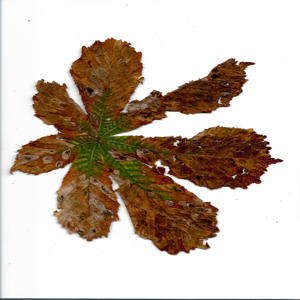

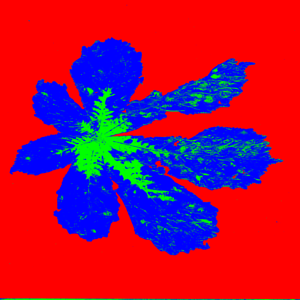

i: 1 | filename: L1-1-21 - kópia.jpeg


C:\Users\matox\anaconda3\envs\gastany\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


green ratio: 17 %
green class: 6


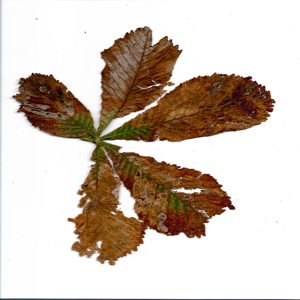

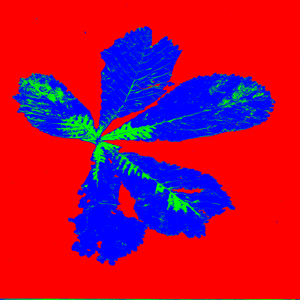

In [11]:
for i, data_dict in enumerate(data_list[:N_proc_imgs]):
    print('i:', i, '| filename:', data_dict['filename'])

    im_height, im_width = data_dict['image'].shape[0], data_dict['image'].shape[1]    
    
    pixel_classes = utils.calculate_pixel_classes(data_dict['image'], const.colors)

    # Calculate statistics for the image
    green_ratio, leaf_ratio, green_class = utils.calculate_image_statistics(pixel_classes, 
                                                                            const.colors,
                                                                            const.N_green_classes)
    # Write calculated data to data_list structure
    data_dict['green_ratio'], data_dict['green_class'] = green_ratio, green_class
    data_dict['leaf_area_cm'] = round(leaf_ratio * const.image_size_cm)
    
    # Print and display results
    # im_pallet = pixel_classes.reshape(im_height, im_width)
    im_mapped = np.array(utils.map_colors(pixel_classes, const.class_colors_to_display)).reshape((im_height, im_width, 3)).astype(np.uint8)
    im_pil = Image.fromarray(data_dict['image'])

    green_pct = round(green_ratio * 100)
    print('green ratio:', green_pct, '%')
    print('green class:', green_class)
    
    display(im_pil.resize((300,300)))
    display(Image.fromarray(im_mapped).resize((300, 300)))

# Produce excel with results for each leaf image

In [6]:
columns_out = ['filename', 'green_ratio', 'green_class', 'leaf_area_cm']
pd.DataFrame(data_list)[columns_out]

,filename,green_ratio,green_class,leaf_area_cm
0,L1-1-19 - kópia.jpeg,0.201227,6,216
1,L1-1-21 - kópia.jpeg,0.155201,6,191
2,L1-1-22 - kópia.jpeg,0.206959,6,214
3,L1-2-11 - kópia.jpeg,0.140150,6,249
4,L1-2-24 - kópia.jpeg,0.191588,6,188
...,...,...,...,...
100,L7-4-2.jpg,0.908527,1,272
101,L7-4-3.jpg,0.916709,1,233
102,L7-5-1.jpg,0.325877,5,138
103,L7-5-2.jpg,0.248955,6,212


In [7]:
pd.DataFrame(data_list)[columns_out].to_excel('vysledky_29_06.xlsx', index=False)